In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

#url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv'
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


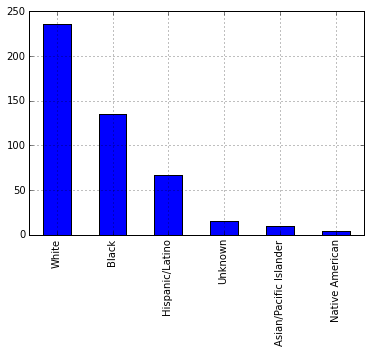

In [2]:
police_killings['raceethnicity'].value_counts().plot(kind = 'bar')

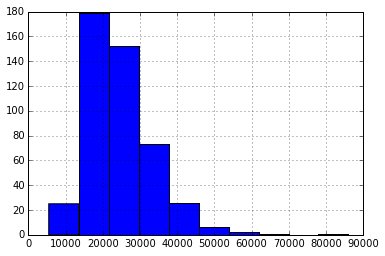

In [3]:
income = police_killings['p_income'][police_killings['p_income'] != '-'].astype(float)
income.hist()

In [4]:
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states1 = pd.merge(states, state_pop, on = 'STATE', how = 'inner')
states1.head()
states = states1
states['pop_millions'] = states['POPESTIMATE2015']/1000000
#states['pop_millions'].head()
states['rate'] = states['shootings']/states['pop_millions']
#states['rate'].head()
states.head()
#states[['NAME', 'shootings', 'pop_millions', 'rate']].sort('rate')


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
0,6,74,40,4,9,California,39144818,30023902,76.7,39.144818,1.890416
1,48,47,40,3,7,Texas,27469114,20257343,73.7,27.469114,1.711013
2,12,29,40,3,5,Florida,20271272,16166143,79.7,20.271272,1.430596
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674


In [5]:
states = states1
states['pop_millions'] = states['POPESTIMATE2015']/1000000
#states['pop_millions'].head()
states['rate'] = states['shootings']/states['pop_millions']
#states['rate'].head()
states[['NAME', 'shootings', 'pop_millions', 'rate']].sort('rate')

,NAME,shootings,pop_millions,rate
43,Connecticut,1,3.590886,0.278483
22,Pennsylvania,7,12.802503,0.546768
38,Iowa,2,3.123899,0.640226
6,New York,13,19.795791,0.656705
29,Massachusetts,5,6.794422,0.735898
42,New Hampshire,1,1.330608,0.751536
45,Maine,1,1.329328,0.752260
11,Illinois,11,12.859995,0.855366
12,Ohio,10,11.613423,0.861073
31,Wisconsin,5,5.771337,0.866350


The lowest rates were from Connecticut and Pennsylvania which was not that surprising despite Philadelphia being in PA.  The highest police shooting rates were in Arizona and Oklahoma.  Arizona's reputation as a tough law and order state are unsurprising but I am a bit surprised by Oklahoma.  To investigate this further, I will look into census data related to race and income to look for correlations.  

In [6]:
state_srt = states[['NAME', 'rate']].sort('rate')
#top10 = state_srt[:10]['NAME']
#last10 = state_srt[-10:]['NAME']
#last10.head()

pk = police_killings[(police_killings['share_white']!= '-') & (police_killings['share_hispanic'] != '-') & (police_killings['share_black'] != '-')]
#pk[['share_white', 'share_black', 'share_hispanic']].astype(float)
pk.head()
                                                                                                                    

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [7]:
lowest10 =  ['CT', 'IA', 'NY', 'MA', 'NH', 'ME', 'IL', 'OH', 'WI', 'MI']
highest10 = ['OK', 'AZ', 'NE', 'HI', 'AK', 'ID', 'NM', 'LA', 'CO', 'DE']

pk_low10 = pk[pk['state'].isin(lowest10)]
pk_low10.head()

pk_high10 = pk[pk['state'].isin(highest10)]
#pk_low10[['share_white', 'share_black', 'share_hispanic']].astype(float).describe()


In [8]:
pk_high10[['share_white', 'share_black', 'share_hispanic']].astype(float).describe()

,share_white,share_black,share_hispanic
count,92.000000,92.000000,92.000000
mean,55.652174,11.532609,20.693478
std,24.406158,19.591303,20.415690
min,2.100000,0.000000,0.000000
25%,39.175000,0.675000,4.350000
50%,58.200000,2.700000,10.850000
75%,74.200000,11.550000,31.725000
max,95.900000,93.100000,81.500000


In [12]:
pk_low10[['share_white', 'share_black', 'share_hispanic']].astype(float).describe()

,share_white,share_black,share_hispanic
count,58.000000,58.000000,58.000000
mean,61.393103,22.353448,11.370690
std,34.145036,30.479036,14.188926
min,0.000000,0.000000,0.000000
25%,41.725000,1.875000,1.625000
50%,75.300000,8.550000,4.750000
75%,90.525000,29.775000,18.225000
max,97.200000,98.900000,71.900000
